In [ ]:
!apt-get install -y gdal-bin python3-gdal
!pip install rasterio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-dev python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 41 not upgraded.
Need to get 5,168 kB of archives.
After this operation, 25.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.8.4+dfsg-1~jammy0 [1,095 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.8.4+dfsg-1~jammy0 [605 kB]
Fetched 5,168 kB in 5s (1,074 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 121713 files and direct

Starting with Unsupervised Learning.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

In [ ]:
path = "Dundalk_Sentinel2_2023.tif"

In [ ]:
with rasterio.open(path) as src:
    print("Band count:", src.count)
    print("Descriptions:", src.descriptions)

Band count: 23
Descriptions: ('B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'AOT', 'WVP', 'SCL', 'TCI_R', 'TCI_G', 'TCI_B', 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10', 'QA20', 'QA60')


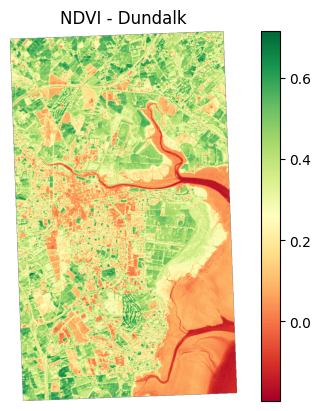

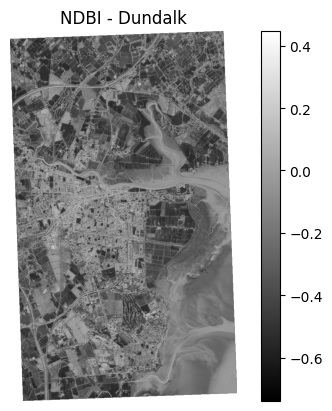

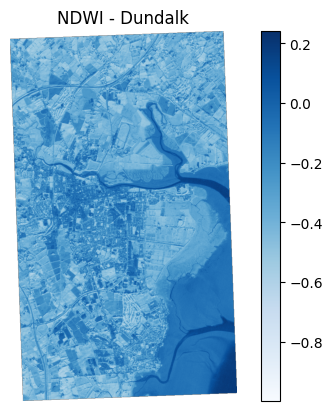

In [ ]:
with rasterio.open(path) as src:
    red   = src.read(4).astype(float)   # B4
    green = src.read(3).astype(float)   # B3
    nir   = src.read(8).astype(float)   # B8
    swir1 = src.read(11).astype(float)  # B11
    swir2 = src.read(12).astype(float)  # B12

# Indices
ndvi = (nir - red) / (nir + red + 1e-10)
ndbi = (swir1 - nir) / (swir1 + nir + 1e-10)
ndwi = (green - nir) / (green + nir + 1e-10)

# NDVI map
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title("NDVI - Dundalk")
plt.axis("off")
plt.show()

# NDBI map
plt.imshow(ndbi, cmap='gray')  # grayscale or you can choose another colormap like 'coolwarm'
plt.colorbar()
plt.title("NDBI - Dundalk")
plt.axis("off")
plt.show()

# NDWI map
plt.imshow(ndwi, cmap='Blues')  # 'Blues' is good for water visualization
plt.colorbar()
plt.title("NDWI - Dundalk")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Stack indices
indices = np.stack([ndvi, ndbi, ndwi], axis=0)
height, width = red.shape
indices_reshaped = indices.transpose(1, 2, 0).reshape(-1, 3)

In [ ]:
# Cleaning Data
indices_clean = np.nan_to_num(indices_reshaped, nan=0.0)
kmeans_indices = KMeans(n_clusters=5, random_state=42) # may need different  - elbow method
labels_indices = kmeans_indices.fit_predict(indices_clean)
labels_indices_img = labels_indices.reshape(height, width)

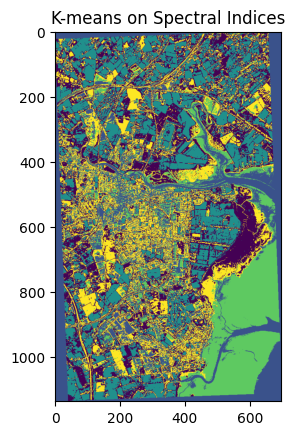

In [ ]:
# Reshape and visualize
labels_indices_img = labels_indices.reshape(height, width)
plt.imshow(labels_indices_img, cmap='viridis')
plt.title('K-means on Spectral Indices')
plt.savefig('kmeans_indices.png')